In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the Data
data = pd.read_csv("WineQT.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nSummary information about the dataset:")
print(data.info())

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

Distribution of the target variable (quality):
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


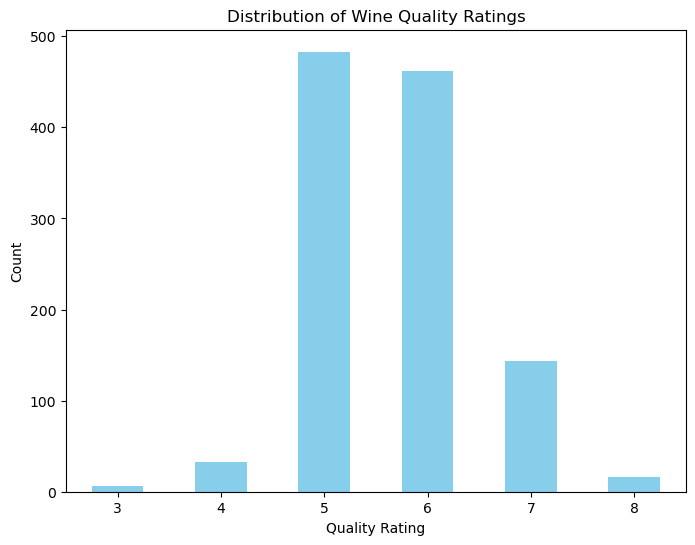

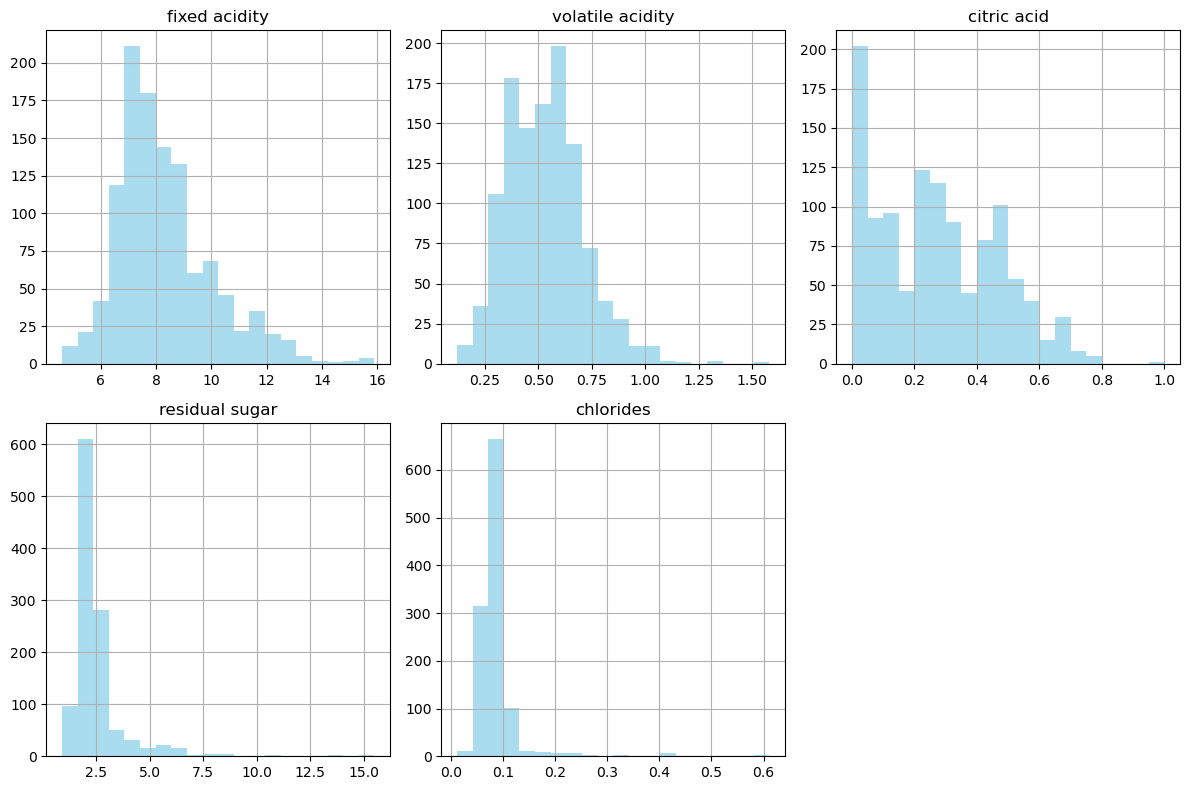

In [3]:
# Step 3: Explore the Data

# Distribution of the target variable
print("Distribution of the target variable (quality):")
print(data['quality'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
data['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Visualize the distribution of some features
plt.figure(figsize=(12, 8))
features_to_visualize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
for feature in features_to_visualize:
    plt.subplot(2, 3, features_to_visualize.index(feature) + 1)
    data[feature].hist(color='skyblue', bins=20, alpha=0.7)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [4]:
# Step 4: Build the Random Forest Model

# Split the data into features (X) and target variable (y)
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7030567685589519


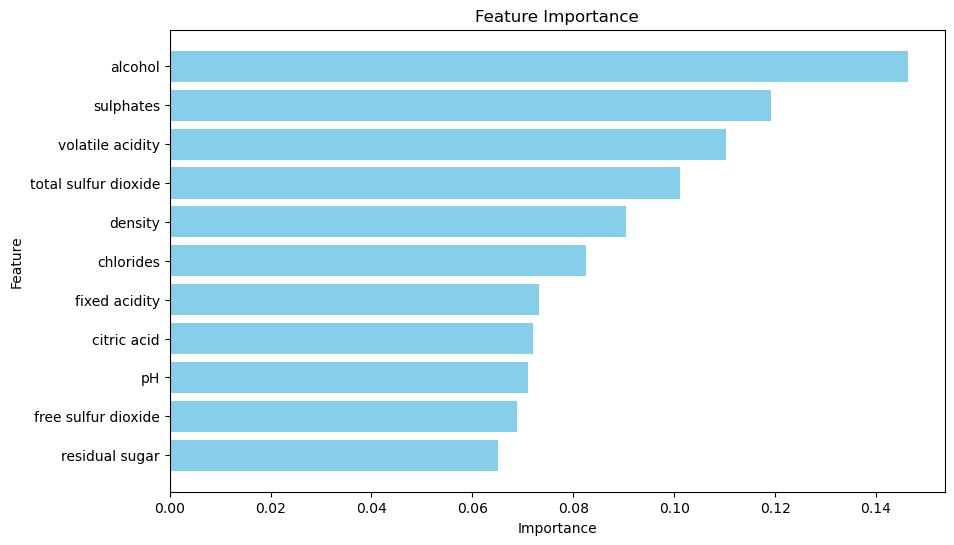

Feature Importance:
                 Feature  Importance
10               alcohol    0.146276
9              sulphates    0.119159
1       volatile acidity    0.110288
6   total sulfur dioxide    0.101212
7                density    0.090431
4              chlorides    0.082482
0          fixed acidity    0.073160
2            citric acid    0.072021
8                     pH    0.070924
5    free sulfur dioxide    0.068906
3         residual sugar    0.065142


In [5]:
# Step 5: Analyze Feature Importance

# Get feature importances from the trained random forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()

# Display the sorted feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)

# Summary of the feature importance:

# Alcohol: Alcohol content appears to be the most important feature in predicting wine quality, with an importance score of approximately 0.146.

# Sulphates: The sulphates content follows alcohol in importance, with a score of around 0.119.

# Volatile Acidity: Volatile acidity is the third most important feature, with an importance score of approximately 0.110.

# Total Sulfur Dioxide, Density, and Chlorides: These features also play significant roles in predicting wine quality, with importance scores ranging from 0.090 to 0.101.

# Fixed Acidity, Citric Acid, pH, Free Sulfur Dioxide, and Residual Sugar: While these features are still important, they have slightly lower importance scores compared to the top features.